# 经典的CNN模型架构

本文主要参考了：[卷积神经网络-进化史](https://blog.csdn.net/cyh_24/article/details/51440344)，[ResNet, AlexNet, VGG, Inception: 理解各种各样的CNN架构](https://zhuanlan.zhihu.com/p/32116277)，[经典的CNN模型架构-LeNet、AlexNet、VGG、GoogleLeNet、ResNet](https://zhuanlan.zhihu.com/p/93069133)，[卷积神经网络](https://wizardforcel.gitbooks.io/learn-dl-with-pytorch-liaoxingyu/4.html)，[深度学习——卷积神经网络 的经典网络（LeNet-5、AlexNet、ZFNet、VGG-16、GoogLeNet、ResNet）](https://www.cnblogs.com/guoyaohua/p/8534077.html)，[【卷积神经网络发展历程】从LeNet、AlexNet到ResNet、SENet](https://blog.csdn.net/u012679707/article/details/80870625?depth_1-utm_source=distribute.pc_relevant.none-task&utm_source=distribute.pc_relevant.none-task)等，来记录在实际应用中常见的CNN经典模型架构。

卷积神经网络在视觉识别任务上的表现令人称奇。好的CNN网络是带有上百万参数和许多隐含层的“庞然怪物”。事实上，一个不好的经验规则是：网络越深，效果越好。AlexNet，VGG，Inception和ResNet是最近一些流行的CNN网络。为什么这些网络表现如此之好？它们是如何设计出来的？为什么它们设计成那样的结构？回答这些问题并不简单，但是这里我们试着去探讨上面的一些问题。网络结构设计是一个复杂的过程，需要花点时间去学习，甚至更长时间去自己动手实验。首先，我们先来讨论一个基本问题：

为什么CNN模型战胜了传统的计算机视觉方法？

图像分类指的是给定一个图片将其分类成预先定义好的几个类别之一。图像分类的传统流程涉及两个模块：**特征提取和分类**。

特征提取指的是从原始像素点中提取更高级的特征，这些特征能捕捉到各个类别间的区别。这种特征提取是使用无监督方式，从像素点中提取信息时没有用到图像的类别标签。常用的传统特征包括GIST, HOG, SIFT, LBP等。特征提取之后，使用图像的这些特征与其对应的类别标签训练一个分类模型。常用的分类模型有SVM，LR，随机森林及决策树等。

上面流程的一大问题是**特征提取不能根据图像和其标签进行调整**。如果选择的特征缺乏一定的代表性来区分各个类别，模型的准确性就大打折扣，无论你采用什么样的分类策略。采用传统的流程，目前的一个比较好的方法是**使用多种特征提取器，然后组合它们得到一种更好的特征**。但是这需要很多启发式规则和人力来根据领域不同来调整参数使得达到一个很好的准确度，这里说的是要接近人类水平。这也就是为什么采用传统的计算机视觉技术需要花费多年时间才能打造一个好的计算机视觉系统（如OCR，人脸验证，图像识别，物体检测等），这些系统在实际应用中可以处理各种各样的数据。有一次，我们用了6周时间为一家公司打造了一个CNN模型，其效果更好，采用传统的计算机视觉技术要达到这样的效果要花费一年时间。

传统流程的另外一个问题是它与人类学习识别物体的过程是完全不一样的。自从出生之初，一个孩子就可以感知周围环境，随着他的成长，他接触更多的数据，从而学会了识别物体。这是深度学习背后的哲学，其中并没有建立硬编码的特征提取器。它**将特征提取和分类两个模块集成一个系统**，通过识别图像的特征来进行提取并基于有标签数据进行分类。

这样的集成系统就是多层感知机，即有多层神经元密集连接而成的神经网络。一个经典的深度网络包含很多参数，由于缺乏足够的训练样本，基本不可能训练出一个不过拟合的模型。但是对于CNN模型，从头开始训练一个网络时你可以使用一个很大的数据集如ImageNet。这背后的原因是CNN模型的两个特点：神经元间的权重共享和卷积层之间的稀疏连接。这可以从下图中看到。在卷积层，某一个层的神经元只是和输入层中的神经元局部连接，而且卷积核的参数是在整个2-D特征图上是共享的。

![](img/v2-60ca0505bed29b6b7a28eb66d51715c1_720w.jpg)

为了理解CNN背后的设计哲学，你可能会问：其目标是什么？

（1）准确度

如果你在搭建一个智能系统，最重要的当然是要尽可能地准确。公平地来说，准确度不仅取决于网路，也取决于训练样本数量。因此，CNN模型一般在一个标准数据集ImageNet（稍后记录）上做对比。

ImageNet项目仍然在继续改进，目前已经有包含21841类的14,197,122个图片。自从2010年，每年都会举行ImageNet图像识别竞赛，比赛会提供从ImageNet数据集中抽取的属于1000类的120万张图片。每个网络架构都是在这120万张图片上测试其在1000类上的准确度。

（2）计算量

大部分的CNN模型都需要很大的内存和计算量，特别是在训练过程。因此，计算量会成为一个重要的关注点。同样地，如果你想部署在移动端，训练得到的最终模型大小也需要特别考虑。你可以想象到，为了得到更好的准确度你需要一个计算更密集的网络。因此，准确度和计算量需要折中考虑。

除了上面两个因素，还有其他需要考虑的因素，如训练的容易度，模型的泛化能力等。

下面按照提出时间介绍一些最流行的CNN架构，可以看到它们准确度越来越高。

## 经典数据集

在网络之前，先简单介绍下数据集。计算机视觉是一直深度学习的主战场，这里有近几年非常流行的卷积网络结构，网络结构由浅变深，参数越来越多，网络有着更多的跨层链接。不过首先，要先看看计算机视觉领域都有哪些常用的数据集。

前面已经多次提到了MNIST数据集，就不再赘述了。这里先介绍一个数据集 cifar10，后面将以此数据集为例介绍各种卷积网络的结构。主要参考了：[Dataset之CIFAR-10](https://blog.csdn.net/qq_41185868/article/details/82793025)。

 CIFAR-10是一个更接近普适物体的彩色图像数据集。CIFAR-10 是由Hinton 的学生Alex Krizhevsky 和Ilya Sutskever 整理的一个用于识别普适物体的小型数据集。一共包含10 个类别的RGB 彩色图片：飞机（ airplane ）、汽车（ automobile ）、鸟类（ bird ）、猫（ cat ）、鹿（ deer ）、狗（ dog ）、蛙类（ frog ）、马（ horse ）、船（ ship ）和卡车（ truck ）。每个图片的尺寸为32 × 32 ，每个类别有6000个图像，数据集中一共有50000 张训练图片和10000 张测试图片。
 
与MNIST 数据集中目比， CIFAR-10 真高以下不同点:

1. CIFAR-10 是3 通道的彩色RGB 图像，而MNIST 是灰度图像。
2. CIFAR-10 的图片尺寸为32 × 32 ， 而MNIST 的图片尺寸为28 × 28 ，比MNIST 稍大。
3. 相比于手写字符， CIFAR-10 含有的是现实世界中真实的物体，不仅噪声很大，而且物体的比例、特征都不尽相同，这为识别带来很大困难。直接的线性模型如Softmax 在CIFAR-10 上表现得很差。

另一个有名的数据集就是 ImageNet。ImageNet 是一个包含超过1500万幅手工标记的高分辨率图像的数据库，大约有22000个类别。该数据库组织类似于层次结构，其中每个领域叫同义词集合。每个同义词集合都是 ImageNet层次结构中的一个节点。每个节点都包含超过500幅图像。

ImageNet大规模视觉识别挑战赛（ILSVRC）成立于2010年，旨在提高大规模目标检测和图像分类的最新技术。

在对 ImageNet概览之后，我们现在来看看不同的CNN模型架构。

## LeNet 网络

2010年，在 ImageNet挑战赛也称为 ILSVRC2010 中出现了一个CNN架构—— LeNet5，由 Yann Lecun创建。该网络以一个32×32的图像作为输入，然后进入卷积层（C1），接着进入子采样层（S2），目前子采样层被池化层取代。然后是另一个卷积层序列（C3），跟着是一个池化层（即子采样层）（S4）最后，有全连接层，包括最后的输出层（OUTPUT）。从那以后，在这个比赛的助力下，每年都会引入不同的CNN架构。 LeNet5网络架构如图所示。我们可以得出以下几点:

![](img/20180116200718432.png)

- 输入尺寸：32*32
- 卷积层：2个
- 降采样层(池化层)：2个
- 全连接层：2个
- 输出层：1个。10个类别（数字0-9的概率）

LeNet的网络结构麻雀虽小，但五脏俱全，卷积层、pooling层、全连接层，这些都是现代CNN网络的基本组件。具体的代码示例可以参考：[bentrevett/pytorch-image-classification](https://github.com/bentrevett/pytorch-image-classification)。接下来看看例子。首先下载 CIFAR-10 数据集。

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import random
import time

import matplotlib.pyplot as plt

import numpy as np

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

train_data = datasets.CIFAR10(root = 'data', 
                              train = True, 
                              download = True)

means = train_data.data.mean(axis = (0,1,2)) / 255
stds = train_data.data.std(axis = (0,1,2)) / 255

print(f'Calculated means: {means}')
print(f'Calculated stds: {stds}')

0it [00:00, ?it/s]

Calculated means: [0.49139968 0.48215841 0.44653091]
Calculated stds: [0.24703223 0.24348513 0.26158784]


接下来读取数据。

In [2]:
train_transforms = transforms.Compose([
                           transforms.RandomHorizontalFlip(),
                           transforms.RandomRotation(10),
                           transforms.RandomCrop(32, padding = 3),
                           transforms.ToTensor(),
                           transforms.Normalize(mean = means, 
                                                std = stds)
                       ])

test_transforms = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean = means, 
                                                std = stds)
                       ])

train_data = datasets.CIFAR10('data', 
                              train = True, 
                              download = True, 
                              transform = train_transforms)

test_data = datasets.CIFAR10('data', 
                             train = False, 
                             download = True, 
                             transform = test_transforms)


n_train_examples = int(len(train_data)*0.9)
n_valid_examples = len(train_data) - n_train_examples

train_data, valid_data = torch.utils.data.random_split(train_data, 
                                                       [n_train_examples, n_valid_examples])
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Files already downloaded and verified
Files already downloaded and verified
Number of training examples: 45000
Number of validation examples: 5000
Number of testing examples: 10000


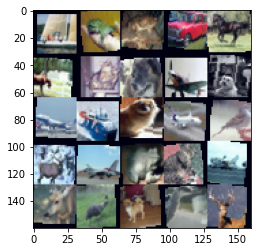

In [3]:
n_imgs = 25

batch = torch.zeros(n_imgs, 3, 32, 32)

for i in range(n_imgs):
    img, _ = train_data[i]
    batch[i] = img
        
grid_img = torchvision.utils.make_grid(batch, 
                                       nrow = 5,
                                       padding = 0,
                                       normalize = True)

plt.imshow(grid_img.permute(1, 2, 0))

In [4]:
BATCH_SIZE = 64

train_iterator = torch.utils.data.DataLoader(train_data, 
                                             shuffle = True, 
                                             batch_size = BATCH_SIZE)

valid_iterator = torch.utils.data.DataLoader(valid_data, 
                                             batch_size = BATCH_SIZE)

test_iterator = torch.utils.data.DataLoader(test_data,
                                            batch_size = BATCH_SIZE)

下面给出网络结构，和前面提到的是一样的

In [5]:
class LeNet(nn.Module):
    def __init__(self, output_dim):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels = 3, 
                               out_channels = 6, 
                               kernel_size = 5)
        
        self.conv2 = nn.Conv2d(in_channels = 6, 
                               out_channels = 16, 
                               kernel_size = 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        
        self.fc2 = nn.Linear(120, 84)
        
        self.fc3 = nn.Linear(84, output_dim)

    def forward(self, x):

        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size = 2)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size = 2)
        
        x = x.view(x.shape[0], -1)
        
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        
        x = self.fc3(x)
        
        return x
    

OUTPUT_DIM = 10

model = LeNet(OUTPUT_DIM)
model

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [6]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 62,006 trainable parameters


下面开始训练：

In [7]:
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)
criterion = criterion.to(device)

In [8]:
def calculate_accuracy(fx, y):
    preds = fx.argmax(1, keepdim=True)
    correct = preds.eq(y.view_as(preds)).sum()
    acc = correct.float()/preds.shape[0]
    return acc

def train(model, iterator, optimizer, criterion, device):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for (x, y) in iterator:
        
        x = x.to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
                
        fx = model(x)
        
        loss = criterion(fx, y)
        
        acc = calculate_accuracy(fx, y)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            fx = model(x)

            loss = criterion(fx, y)

            acc = calculate_accuracy(fx, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [9]:
EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(EPOCHS):
    
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut3-model.pt')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

C:\Users\hust2\miniconda3\envs\HDB\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 01 | Epoch Time: 0m 22s
	Train Loss: 1.738 | Train Acc: 35.65%
	 Val. Loss: 1.538 |  Val. Acc: 43.89%
Epoch: 02 | Epoch Time: 0m 24s
	Train Loss: 1.473 | Train Acc: 45.97%
	 Val. Loss: 1.466 |  Val. Acc: 47.57%
Epoch: 03 | Epoch Time: 0m 24s
	Train Loss: 1.361 | Train Acc: 50.97%
	 Val. Loss: 1.336 |  Val. Acc: 52.04%
Epoch: 04 | Epoch Time: 0m 25s
	Train Loss: 1.299 | Train Acc: 53.35%
	 Val. Loss: 1.265 |  Val. Acc: 54.75%
Epoch: 05 | Epoch Time: 0m 23s
	Train Loss: 1.254 | Train Acc: 54.81%
	 Val. Loss: 1.259 |  Val. Acc: 55.32%
Epoch: 06 | Epoch Time: 0m 24s
	Train Loss: 1.220 | Train Acc: 56.38%
	 Val. Loss: 1.272 |  Val. Acc: 55.22%
Epoch: 07 | Epoch Time: 0m 24s
	Train Loss: 1.191 | Train Acc: 57.45%
	 Val. Loss: 1.250 |  Val. Acc: 56.41%
Epoch: 08 | Epoch Time: 0m 24s
	Train Loss: 1.163 | Train Acc: 58.29%
	 Val. Loss: 1.179 |  Val. Acc: 57.89%
Epoch: 09 | Epoch Time: 0m 24s
	Train Loss: 1.146 | Train Acc: 59.32%
	 Val. Loss: 1.194 |  Val. Acc: 58.52%
Epoch: 10 | Epoch T

最后测试

In [10]:
model.load_state_dict(torch.load('tut3-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion, device)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 1.039 | Test Acc: 63.11%


后面就只展示网络结构，不再一一训练了。

## AlexNet

AlexNet 可以说是具有历史意义的一个网络结构，可以说在AlexNet之前，深度学习已经沉寂了很久。历史的转折在2012年到来，AlexNet 在当年的ImageNet图像分类竞赛中，top-5错误率比上一年的冠军下降了十个百分点，而且远远超过当年的第二名。

AlexNet 之所以能够成功，深度学习之所以能够重回历史舞台，原因在于：

- 非线性激活函数：ReLU
- 防止过拟合的方法：Dropout，Data augmentation
- 大数据训练：百万级ImageNet图像数据
- 其他：GPU实现，LRN归一化层的使用

![](img/20180116215815791.png)

下面简单记录下其细节。

有一种观点认为神经网络是靠数据喂出来的，若增加训练数据，则能够提升算法的准确率，因为这样可以避免过拟合，而避免了过拟合你就可以增大你的网络结构了。当训练数据有限的时候，可以通过一些变换来从已有的训练数据集中生成一些新的数据，来扩大训练数据的size。

其中，最简单、通用的图像数据变形的方式:

1. 从原始图像（256,256）中，随机的crop出一些图像（224,224）。【平移变换，crop】
2. 水平翻转图像。【反射变换，flip】
3. 给图像增加一些随机的光照。【光照、彩色变换，color jittering】

AlexNet 训练的时候，在data augmentation上处理的很好，比如：

- 随机crop。训练时候，对于256＊256的图片进行随机crop到224＊224，然后允许水平翻转，那么相当与将样本倍增到((256-224)^2)*2=2048。
- 测试时候，对左上、右上、左下、右下、中间做了5次crop，然后翻转，共10个crop，之后对结果求平均。作者说，不做随机crop，大网络基本都过拟合(under substantial overfitting)。
- 对RGB空间做PCA，然后对主成分做一个(0, 0.1)的高斯扰动。结果让错误率又下降了1%。

另外还有Dropout。结合预先训练好的许多不同模型，来进行预测是一种非常成功的减少测试误差的方式（Ensemble）。但因为每个模型的训练都需要花了好几天时间，因此这种做法对于大型神经网络来说太过昂贵。

然而，AlexNet 提出了一个非常有效的模型组合版本，它在训练中只需要花费两倍于单模型的时间。这种技术叫做Dropout，它做的就是以0.5的概率，将每个隐层神经元的输出设置为零。以这种方式“dropped out”的神经元既不参与前向传播，也不参与反向传播。

所以**每次输入一个样本，就相当于该神经网络就尝试了一个新的结构，但是所有这些结构之间共享权重**。因为神经元不能依赖于其他特定神经元而存在，所以这种技术降低了神经元复杂的互适应关系。

正因如此，网络需要被迫学习更为鲁棒的特征，这些特征在结合其他神经元的一些不同随机子集时有用。在测试时，我们将所有神经元的输出都仅仅只乘以0.5，对于获取指数级dropout网络产生的预测分布的几何平均值，这是一个合理的近似方法。

接下来就看看AlexNet的代码

In [11]:
class AlexNet(nn.Module):
    def __init__(self, output_dim):
        super().__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, 2, 1), #in_channels, out_channels, kernel_size, stride, padding
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2), #kernel_size
            nn.Conv2d(64, 192, 3, padding = 1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Conv2d(192, 384, 3, padding = 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, 3, padding = 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding = 1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x
    
OUTPUT_DIM = 10

model = AlexNet(OUTPUT_DIM)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, in

可以看到，features是用卷积来提取特征，最后classifier是全连接层。

## VGGNet

vggNet 是第一个真正意义上的深层网络结构，其是 ImageNet2014年的冠军，是牛津大学计算机视觉组（Visual Geometry Group）和Google DeepMind公司的研究员一起研发的深度卷积神经网络。

VGGNet探索了卷积神经网络的深度与其性能之间的关系，通过反复堆叠3\*3的小型卷积核和2\*2的最大池化层，

VGGNet成功地构筑了**16~19层深的卷积神经网络**。VGGNet相比之前state-of-the-art的网络结构，错误率大幅下降。

VGGNet论文中全部使用了3\*3的小型卷积核和2\*2的最大池化核，使用小的卷积核进行多层的堆叠和一个大的卷积核的感受野是相同的，同时小的卷积核还能减少参数，同时可以有更深的结构，这样通过不断加深网络结构来提升性能。

vgg 的网络结构非常简单，就是不断地堆叠卷积层和池化层，下面是一个简单的图示

![](img/20180116225416971.png)

1. VGGNet拥有5段卷积，每段卷积内有2-3个卷积层，同时每段尾部都会连接一个最大池化层（用来缩小图片）。
2. 每段内的卷积核数量一样，越后边的段内卷积核数量越多，依次为:64-128-256-512-512
3. 越深的网络效果越好。
4. LRN层作用不大（作者结论）
5. 1\*1的卷积也是很有效的，但是没有3\*3的卷积好，大一些的卷积核可以学习更大的空间特征。

VGGNet的贡献在于证明使用很小的卷积（3\*3），增加网络深度可以有效提升模型的效果，而且VGGNet对其他数据集具有很好的泛化能力。到目前为止，VGGNet依然经常被用来提取图像特征。

接下来给出代码

In [12]:
class VGGBlock(nn.Module):
    def __init__(self, in_channels, out_channels, batch_norm):
        super().__init__()
        
        modules = []
        modules.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        if batch_norm:
            modules.append(nn.BatchNorm2d(out_channels))
        modules.append(nn.ReLU(inplace=True))
    
        self.block = nn.Sequential(*modules)
    
    def forward(self, x):
        return self.block(x)

In [13]:
class VGG11(nn.Module):
    def __init__(self, output_dim, block, pool, batch_norm):
        super().__init__()
        
        self.features = nn.Sequential(
            block(3, 64, batch_norm), #in_channels, out_channels
            pool(2, 2), #kernel_size, stride
            block(64, 128, batch_norm),
            pool(2, 2),
            block(128, 256, batch_norm),
            block(256, 256, batch_norm),
            pool(2, 2),
            block(256, 512, batch_norm),
            block(512, 512, batch_norm),
            pool(2, 2),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            pool(2, 2),
        )
        
        self.classifier = nn.Linear(512, output_dim)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x

In [14]:
class VGG16(nn.Module):
    def __init__(self, output_dim, block, pool, batch_norm):
        super().__init__()
        
        self.features = nn.Sequential(
            block(3, 64, batch_norm),
            block(64, 64, batch_norm),
            pool(2, 2),
            block(64, 128, batch_norm),
            block(128, 128, batch_norm),
            pool(2, 2),
            block(128, 256, batch_norm),
            block(256, 256, batch_norm),
            block(256, 256, batch_norm),
            pool(2, 2),
            block(256, 512, batch_norm),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            pool(2, 2),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            pool(2, 2),
        )
        
        self.classifier = nn.Linear(512, output_dim)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x

In [15]:
class VGG19(nn.Module):
    def __init__(self, output_dim, block, pool, batch_norm):
        super().__init__()
        
        self.features = nn.Sequential(
            block(3, 64, batch_norm),
            block(64, 64, batch_norm),
            pool(2, 2),
            block(64, 128, batch_norm),
            block(128, 128, batch_norm),
            pool(2, 2),
            block(128, 256, batch_norm),
            block(256, 256, batch_norm),
            block(256, 256, batch_norm),
            block(256, 256, batch_norm),
            pool(2, 2),
            block(256, 512, batch_norm),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            pool(2, 2),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            block(512, 512, batch_norm),
            pool(2, 2),
        )
        
        self.classifier = nn.Linear(512, output_dim)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x

In [16]:
OUTPUT_DIM = 10
BATCH_NORM = True

vgg11_model = VGG11(OUTPUT_DIM, VGGBlock, nn.MaxPool2d, BATCH_NORM) 
vgg16_model = VGG16(OUTPUT_DIM, VGGBlock, nn.MaxPool2d, BATCH_NORM) 
vgg19_model = VGG19(OUTPUT_DIM, VGGBlock, nn.MaxPool2d, BATCH_NORM)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'VGG11 has {count_parameters(vgg11_model):,} trainable parameters')
print(f'VGG16 has {count_parameters(vgg16_model):,} trainable parameters')
print(f'VGG19 has {count_parameters(vgg19_model):,} trainable parameters')

VGG11 has 9,231,114 trainable parameters
VGG16 has 14,728,266 trainable parameters
VGG19 has 20,040,522 trainable parameters


In [17]:
vgg11_model

VGG11(
  (features): Sequential(
    (0): VGGBlock(
      (block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): VGGBlock(
      (block): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): VGGBlock(
      (block): Sequential(
        (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
   

## GoogleNet

前面的 VGG 是 2014 年 ImageNet 比赛的亚军，那么冠军是谁呢？就是 GoogLeNet，这是 Google 的研究人员提出的网络结构，在当时取得了非常大的影响，因为网络的结构变得前所未有，它颠覆了大家对卷积网络的串联的印象和固定做法，采用了一种非常有效的 **inception 模块**，得到了比 VGG 更深的网络结构，但是却比 VGG 的参数更少，因为其去掉了后面的全连接层，所以参数大大减少，同时有了很高的计算效率。

这是因为GoogLeNet是一个非常深的网络。添加的层数越多，参数的数量就越多，而且网络很可能出现过拟合。同时计算量将会更大，因为滤波器的线性增加将会导致计算量的二次方增大。所以设计人员使用了 inception模块和GAP。因为后全连接层容易过拟合，因此在网络末端将使用GAP替代全连接层。GAP没有需要学习或优化的参数。

那一届的GoogleNet通常被称为Inception V1，Inception V1的特点是控制了计算量的参数量的同时（GoogLeNet最吸引人之处在于它的运行速度非常快），获得了非常好的性能-top5错误率6.67%, 所以GoogleNet又被称为Inception V1(后面还有改进版V2、V3、V4)，该架构中有22层深，比VGGNet和AlexNet都深，但是它只有500万的参数量，计算量也只有15亿次浮点运算，在参数量和计算量下降的同时保证了准确率，可以说是非常优秀并且实用的模型。

下面看看它创新的inception模块。Inception架构的主要思想是找出如何用密集成分来近似最优的局部稀疏结。

![](img/20180117164040589.png)

对上图做以下说明： 

1. 采用不同大小的卷积核意味着不同大小的感受野，最后拼接意味着**不同尺度特征的融合**； 
2. 之所以卷积核大小采用1\*1、3\*3和5\*5，主要是为了方便对齐。设定卷积步长stride=1之后，只要分别设定padding =0、1、2，采用same卷积可以得到相同维度的特征，然后这些特征直接拼接在一起； 
3. 文章说很多地方都表明pooling挺有效，所以Inception里面也嵌入了pooling。 
4. 网络越到后面特征越抽象，且每个特征涉及的感受野也更大，随着层数的增加，3x3和5x5卷积的比例也要增加。

一个 inception 模块的四个并行线路如下： 
1. 一个 1 x 1 的卷积，一个小的感受野进行卷积提取特征 
2. 一个 1 x 1 的卷积加上一个 3 x 3 的卷积，1 x 1 的卷积降低输入的特征通道，减少参数计算量，然后接一个 3 x 3 的卷积做一个较大感受野的卷积 
3. 一个 1 x 1 的卷积加上一个 5 x 5 的卷积，作用和第二个一样 
4. 一个 3 x 3 的最大池化加上 1 x 1 的卷积，最大池化改变输入的特征排列，1 x 1 的卷积进行特征提取

![](img/006tNc79gy1fmprivb2hxj30dn09dwef.jpg)

最后将四个并行线路得到的特征在通道这个维度上拼接在一起。下面看看代码

In [18]:
# 定义一个卷积加一个 relu 激活函数和一个 batchnorm 作为一个基本的层结构
def conv_relu(in_channel, out_channel, kernel, stride=1, padding=0):
    layer = nn.Sequential(
        nn.Conv2d(in_channel, out_channel, kernel, stride, padding),
        nn.BatchNorm2d(out_channel, eps=1e-3),
        nn.ReLU(True)
    )
    return layer

In [19]:
class inception(nn.Module):
    def __init__(self, in_channel, out1_1, out2_1, out2_3, out3_1, out3_5, out4_1):
        super(inception, self).__init__()
        # 第一条线路
        self.branch1x1 = conv_relu(in_channel, out1_1, 1)
        
        # 第二条线路
        self.branch3x3 = nn.Sequential( 
            conv_relu(in_channel, out2_1, 1),
            conv_relu(out2_1, out2_3, 3, padding=1)
        )
        
        # 第三条线路
        self.branch5x5 = nn.Sequential(
            conv_relu(in_channel, out3_1, 1),
            conv_relu(out3_1, out3_5, 5, padding=2)
        )
        
        # 第四条线路
        self.branch_pool = nn.Sequential(
            nn.MaxPool2d(3, stride=1, padding=1),
            conv_relu(in_channel, out4_1, 1)
        )
        
    def forward(self, x):
        f1 = self.branch1x1(x)
        f2 = self.branch3x3(x)
        f3 = self.branch5x5(x)
        f4 = self.branch_pool(x)
        output = torch.cat((f1, f2, f3, f4), dim=1)
        return output

下面定义 GoogLeNet，GoogLeNet 可以看作是很多个 inception 模块的串联，注意，原论文中使用了多个输出来解决梯度消失的问题，这里只定义一个简单版本的 GoogLeNet，简化为一个输出

In [20]:
class googlenet(nn.Module):
    def __init__(self, in_channel, num_classes, verbose=False):
        super(googlenet, self).__init__()
        self.verbose = verbose
        
        self.block1 = nn.Sequential(
            conv_relu(in_channel, out_channel=64, kernel=7, stride=2, padding=3),
            nn.MaxPool2d(3, 2)
        )
        
        self.block2 = nn.Sequential(
            conv_relu(64, 64, kernel=1),
            conv_relu(64, 192, kernel=3, padding=1),
            nn.MaxPool2d(3, 2)
        )
        
        self.block3 = nn.Sequential(
            inception(192, 64, 96, 128, 16, 32, 32),
            inception(256, 128, 128, 192, 32, 96, 64),
            nn.MaxPool2d(3, 2)
        )
        
        self.block4 = nn.Sequential(
            inception(480, 192, 96, 208, 16, 48, 64),
            inception(512, 160, 112, 224, 24, 64, 64),
            inception(512, 128, 128, 256, 24, 64, 64),
            inception(512, 112, 144, 288, 32, 64, 64),
            inception(528, 256, 160, 320, 32, 128, 128),
            nn.MaxPool2d(3, 2)
        )
        
        self.block5 = nn.Sequential(
            inception(832, 256, 160, 320, 32, 128, 128),
            inception(832, 384, 182, 384, 48, 128, 128),
            nn.AvgPool2d(2)
        )
        
        self.classifier = nn.Linear(1024, num_classes)
        
    def forward(self, x):
        x = self.block1(x)
        if self.verbose:
            print('block 1 output: {}'.format(x.shape))
        x = self.block2(x)
        if self.verbose:
            print('block 2 output: {}'.format(x.shape))
        x = self.block3(x)
        if self.verbose:
            print('block 3 output: {}'.format(x.shape))
        x = self.block4(x)
        if self.verbose:
            print('block 4 output: {}'.format(x.shape))
        x = self.block5(x)
        if self.verbose:
            print('block 5 output: {}'.format(x.shape))
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x

## ResNet

本节内容还参考了：

- [Introduction to ResNets](https://towardsdatascience.com/introduction-to-resnets-c0a830a288a4)
- [An Overview of ResNet and its Variants](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035)
- [FrancescoSaverioZuppichini/ResNet](https://github.com/FrancescoSaverioZuppichini/ResNet)

当大家还在惊叹 GoogLeNet 的 inception 结构的时候，微软亚洲研究院的研究员何恺明已经在设计更深但结构更加简单的网络 ResNet，并且凭借它在ISLVRC和COCO上横扫所有选手，获得冠军。在2015年的 ImageNet ILSVRC挑战赛中，误差率为3.57％。 ResNet在网络结构上做了大创新，而不再是简单的堆积层数，ResNet在卷积神经网络的新思路，绝对是深度学习发展历程上里程碑式的事件。残差网络的原论文是这篇：https://arxiv.org/pdf/1512.03385.pdf

2012 年，Krizhevsky 等人拉开了卷积神经网络的应用序幕。这是该架构第一次在 ImageNet 上比传统的、手工的特征学习更成功。他们的 DCNN 名为 AlexNet，包含 8 个神经网络层，5 个卷积层和 3 个全连接层。这为传统的 CNN 奠定了基础，卷积层后跟激活函数，然后是最大池化操作（有时会省略池化操作以保持图像的空间分辨率）。

深度神经网络的大部分成功都归功于这些附加层。其功能背后的直觉是这些层逐渐学习更复杂的特征。第一层学习边缘，第二层学习形状，第三层学习物体，第四层学习眼睛整体，依此类推。深度学习网络的深度对最后的分类和识别的效果有着很大的影响，所以正常想法就是能把网络设计的越深越好，但 He 等人经验表明，传统的 CNN 模型存在深度的最大阈值，常规的网络的堆叠（plain network）在网络很深的时候，效果却越来越差了。其中原因之一即是网络越深，梯度消失的现象就越来越明显（离 loss 函数越远的层，在反向传播的时候，梯度越小，就越难以更新，随着层数的增加，这个现象越严重，一定深度后，向前反馈 convNet添加额外层会导致更高的训练误差和验证误差），网络的训练效果也不会很好（但是现在浅层的网络（shallower network）又无法明显提升网络的识别效果了，所以现在要解决的问题就是怎样在加深网络的情况下又解决梯度消失的问题）。 

他们绘制了 20 层 CNN 与 56 层 CNN 的训练和测试误差。如下图所示。

![](img/0_fRYbrOU_YhS6oMf-.png)

这个图违背了我们的信念，即添加更多层会创建更复杂的函数，因此失败将归因于过度拟合。如果是这种情况，额外的正则化参数和算法（例如 dropout 或 L2-norms）将是修复这些网络的成功方法。然而，该图显示 56 层网络的训练误差也高于 20 层网络，突出了解释其失败的其他不同原因。

证据表明，使用卷积层和全连接层的最佳 ImageNet 模型通常包含 16 到 30 层。
56 层 CNN 的失败可能归咎于优化函数、网络初始化或著名的梯度消失/爆炸问题。梯度消失是尤其容易被归咎的一点，然而，作者认为批量归一化的使用确保梯度具有健康的规范。在解释深层网络为何无法比浅层网络表现更好的众多理论中，有时最好寻找实证结果进行解释，然后从那里倒推。通过引入新的神经网络层——残差块，训练非常深的网络的问题得到了缓解。

![](img/0_sGlmENAXIZhSqyFZ.png)

上图是这篇文章最值得学习的地方。对于希望快速实现并测试它的开发人员来说，要理解的最重要的修改是“跳过连接”(Skip Connections)，直接恒等映射（identity mapping）过去。这个identity mapping没有任何参数，只是将前一层的输出添加到前面的层。但是，有时 x 和 F(x) 不会具有相同的维度。回想一下，卷积操作通常会缩小图像的空间分辨率，例如 32 x 32 图像上的 3x3 卷积会产生 30 x 30 图像。所以用恒等映射乘以线性投影 W 的方式来扩展它以匹配残差。这允许将输入 x 和 F(x) 组合为下一层的输入。（当 F(x) 和 x 具有不同维度（例如 32x32 和 30x30）时使用的方程是：$y=F(x,{W_i})+W_sx$。这个 Ws 项可以用 1x1 卷积来实现，这会为模型引入额外的参数）

层之间的Skip Connections将前一层的输出添加到多层后面的输出。这使得训练比以前更深的网络成为可能。ResNet 架构的作者在 CIFAR-10 数据集上用 100 和 1,000 层测试他们的网络。他们在具有 152 层的 ImageNet 数据集上进行测试，该数据集的参数仍然少于 另一种非常流行的深度 CNN 架构 VGG 网络。一组深度残差网络在 ImageNet 上实现了 3.57% 的错误率，在 ILSVRC 2015 分类竞赛中获得第一名。

与 ResNets 类似的方法被称为“高速公路网络”(highway networks)。这些网络也实现了跳跃连接，然而，类似于 LSTM，这些跳跃连接通过参数门传递。这些门决定了有多少信息通过跳过连接。作者指出，当门接近关闭时，层代表非残差函数，而 ResNet 的恒等函数从未关闭。从经验上讲，作者指出，高速公路网络的作者并没有像使用 ResNets 所展示的那样深度展示网络的准确性提升。

总而言之，Skip Connection 是深度卷积网络的一个非常有趣的扩展，经验表明它可以提高 ImageNet 分类的性能。这些层也可用于需要深度网络的其他任务，例如定位、语义分割、生成对抗网络、超分辨率等。残差网络与 LSTM 不同，LSTM 对先前的信息进行门控，因此并非所有信息都通过。此外，本文中展示的 Skip Connections 基本上排列在 2 层块中，它们不使用相同的第 3 层到第 8 层的输入。残差网络更类似于注意力机制，因为它们对网络的内部状态进行建模反对输入。

下面是一个 残差块的实现。

In [21]:
import torch
from functools import partial

In [22]:
from torch import nn

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.in_channels, self.out_channels =  in_channels, out_channels
        self.blocks = nn.Identity()
        self.shortcut = nn.Identity()   
    
    def forward(self, x):
        residual = x
        if self.should_apply_shortcut: residual = self.shortcut(x)
        x = self.blocks(x)
        x += residual
        return x
    
    @property
    def should_apply_shortcut(self):
        return self.in_channels != self.out_channels

In [23]:
ResidualBlock(32, 64)

ResidualBlock(
  (blocks): Identity()
  (shortcut): Identity()
)

In [24]:
dummy = torch.ones((1, 1, 1, 1))

block = ResidualBlock(1, 64)
block(dummy)

tensor([[[[2.]]]])

上面得shortcut函数是简单定义的，直接和x相等，实际中可能是这样：

![](img/Block.png)

In [25]:
class Conv2dAuto(nn.Conv2d):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.padding =  (self.kernel_size[0] // 2, self.kernel_size[1] // 2) # dynamic add padding based on the kernel_size
        
conv3x3 = partial(Conv2dAuto, kernel_size=3, bias=False)

In [26]:
from collections import OrderedDict

class ResNetResidualBlock(ResidualBlock):
    def __init__(self, in_channels, out_channels, expansion=1, downsampling=1, conv=conv3x3, *args, **kwargs):
        super().__init__(in_channels, out_channels)
        self.expansion, self.downsampling, self.conv = expansion, downsampling, conv
        self.shortcut = nn.Sequential(OrderedDict(
        {
            'conv' : nn.Conv2d(self.in_channels, self.expanded_channels, kernel_size=1,
                      stride=self.downsampling, bias=False),
            'bn' : nn.BatchNorm2d(self.expanded_channels)
            
        })) if self.should_apply_shortcut else None
        
        
    @property
    def expanded_channels(self):
        return self.out_channels * self.expansion
    
    @property
    def should_apply_shortcut(self):
        return self.in_channels != self.expanded_channels

In [27]:
ResNetResidualBlock(32, 64)

ResNetResidualBlock(
  (blocks): Identity()
  (shortcut): Sequential(
    (conv): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

ResNet 有效地解决了深度神经网络难以训练的问题，可以训练高达 1000 层的卷积网络。下面是更完整的代码示例。

In [28]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.downsample = nn.Sequential()
        
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
            
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.downsample(x)
        out = F.relu(out)
        return out

class ResNetLayer(nn.Module):
    def __init__(self, block, n_blocks, in_channels, out_channels, stride):
        super().__init__()
        
        self.modules = []
        
        self.modules.append(block(in_channels, out_channels, stride))
        
        for _ in range(n_blocks-1):
            self.modules.append(block(out_channels, out_channels, 1))
            
        self.blocks = nn.Sequential(*self.modules)
    
    def forward(self, x):
        return self.blocks(x) 
    
class ResNet18(nn.Module):
    def __init__(self, layer, block):
        super().__init__()
        
        n_blocks = [2, 2, 2, 2]
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = layer(block, n_blocks[0], 64, 64, 1)
        self.layer2 = layer(block, n_blocks[1], 64, 128, 2)
        self.layer3 = layer(block, n_blocks[2], 128, 256, 2)
        self.layer4 = layer(block, n_blocks[3], 256, 512, 2)
        self.fc = nn.Linear(512, 10)
        
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.shape[0], -1)
        out = self.fc(out)
        return out
    
class ResNet34(nn.Module):
    def __init__(self, layer, block):
        super().__init__()
        
        n_blocks = [3, 4, 6, 3]
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = layer(block, n_blocks[0], 64, 64, 1)
        self.layer2 = layer(block, n_blocks[1], 64, 128, 2)
        self.layer3 = layer(block, n_blocks[2], 128, 256, 2)
        self.layer4 = layer(block, n_blocks[3], 256, 512, 2)
        self.fc = nn.Linear(512, 10)
        
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.shape[0], -1)
        out = self.fc(out)
        return out

In [29]:
model = ResNet18(ResNetLayer, ResNetBlock)
print(model)

ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): ResNetLayer(
    (blocks): Sequential(
      (0): ResNetBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (downsample): Sequential()
      )
      (1): ResNetBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

还有一些其他的更新的网络，这里就暂时不记录了，目前这些已经够用了。最后补充一些训练卷积网络的技巧。

## 更好地训练卷积网络

现实问题往往更加复杂，非常容易出现过拟合的问题，数据增强是对抗过拟合问题的一个重要方法。

常用的数据增强方法如下：

1. 对图片进行一定比例缩放
2. 对图片进行随机位置的截取
3. 对图片进行随机的水平和竖直翻转
4. 对图片进行随机角度的旋转
5. 对图片进行亮度、对比度和颜色的随机变化

这些方法 pytorch 都已经为我们内置在了 torchvision 里面，我们在安装 pytorch 的时候也安装了 torchvision。这里暂时不一一记录了。更多内容可以参考：[数据增强](https://wizardforcel.gitbooks.io/learn-dl-with-pytorch-liaoxingyu/4.7.1.html)

前面我们讲了数据增强和 dropout，而在实际使用中，现在的网络往往不使用 dropout，而是用另外一个技术，叫正则化。
正则化是机器学习中提出来的一种方法，有 L1 和 L2 正则化，目前使用较多的是 L2 正则化，引入正则化相当于在 loss 函数上面加上一项，比如
$$ f = loss + \lambda \sum_{p \in params} ||p||_2^2$$

就是在 loss 的基础上加上了参数的二范数作为一个正则化，我们在训练网络的时候，不仅要最小化 loss 函数，同时还要最小化参数的二范数，也就是说我们会对参数做一些限制，不让它变得太大。
如果我们对新的损失函数 f 求导进行梯度下降，就有
$$ \frac{\partial f}{\partial p_j} = \frac{\partial loss}{\partial p_j} + 2 \lambda p_j$$

那么在更新参数的时候就有
$$ p_j \rightarrow p_j - \eta (\frac{\partial loss}{\partial p_j} + 2 \lambda p_j) = p_j - \eta \frac{\partial loss}{\partial p_j} - 2 \eta \lambda p_j$$

可以看到 $p_j - \eta \frac{\partial loss}{\partial p_j}$ 和没加正则项要更新的部分一样，而后面的 $2\eta \lambda p_j$ 就是正则项的影响，可以看到加完正则项之后会对参数做更大程度的更新，这也被称为权重衰减(weight decay)，在 pytorch 中正则项就是通过这种方式来加入的，比如想在随机梯度下降法中使用正则项，或者说权重衰减，torch.optim.SGD(net.parameters(), lr=0.1, weight_decay=1e-4) 就可以了，这个 weight_decay 系数就是上面公式中的 $\lambda$，非常方便
注意正则项的系数的大小非常重要，如果太大，会极大的抑制参数的更新，导致欠拟合，如果太小，那么正则项这个部分基本没有贡献，所以选择一个合适的权重衰减系数非常重要，这个需要根据具体的情况去尝试，初步尝试可以使用 1e-4 或者 1e-3。

对于基于一阶梯度进行优化的方法而言，开始的时候更新的幅度是比较大的，也就是说开始的学习率可以设置大一点，但是当训练集的 loss 下降到一定程度之后，，使用这个太大的学习率就会导致 loss 一直来回震荡。这个时候就需要对学习率进行衰减已达到 loss 的充分下降，而是用学习率衰减的办法能够解决这个矛盾，学习率衰减就是随着训练的进行不断的减小学习率。可以通过使用一些随机梯度下降以外的优化算法来实现这点，具体可以参考：[An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/index.html#whichoptimizertouse)